# Speed Test

Because one of the biggest constraints we have for the system is the speed of the computations on the Azure notebooks we want to do a speed test for each of the different methods we could use to plot the images in an interactive format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, SelectionSlider
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd

## Animations

We can try using animations to show stuff. I think this will be the fastest however limited in the versitility and interactivity.

In [2]:
%%capture

def animate_plot_1():
    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot([-2,2],[0,0],'k', alpha = 0.1)
    plt.plot([0,0],[-2,2],'k', alpha = 0.1)
    line, = ax.plot([],[],'r', label = '$[x,y]=[sin(\\theta), cos(\\theta)]$')
    xangle, = ax.plot([],[],'r')
    text = plt.text(0.14*np.cos(np.pi/4), 0.14*np.sin(np.pi/4),'')
    
    # x length
    xlength, = plt.plot([], [],'g')
    xtext = plt.text(0, 0,'x')
    # y length
    ylength, = plt.plot([], [],'b')
    ytext = plt.text(0, 0,'y')

    # axis stuff
    plt.axis('off')
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    
    def init():
        line.set_data([], [])
        xangle.set_data([],[])
        text.set_text('')
        xlength.set_data([],[])
        xlength.set_label('')
        xtext.set_position([0,0])
        xtext.set_text('')
        ylength.set_data([],[])
        ylength.set_label('')
        ytext.set_position([0,0])
        ytext.set_text('')
        return [line,text,xangle,xlength,xtext,ylength,ytext]
    
    def animate(theta):
        theta = theta *np.pi/50
        thetavec = np.linspace(0,theta)
        x = np.cos(theta)
        y = np.sin(theta)

        line.set_data([0,x], [0,y])
        xangle.set_data(0.1*np.cos(thetavec), 0.1*np.sin(thetavec))
        text.set_text('$\\theta = $'+'{:.2f} radians'.format(theta))
        xlength.set_data([0,x], [y,y])
        xlength.set_label('x = {:.02f}'.format(x))
        xtext.set_position((x/2, y+0.05))
        xtext.set_text('x = {:.2f}'.format(x))
        ylength.set_data([x,x], [0,y])
        ylength.set_label('y = {:.02f}'.format(y))
        ytext.set_position((x+0.05, y/2))
        ytext.set_text('y = {:.2f}'.format(y))
        return [line,text,xangle,xlength,xtext,ylength,ytext]

    
    ani = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=100, interval=100, blit=True)
    return HTML(ani.to_jshtml())

ani = animate_plot_1()

In [3]:
ani

## Recalculate every frame

I think this will be the slowest method.

<IPython.core.display.Javascript object>


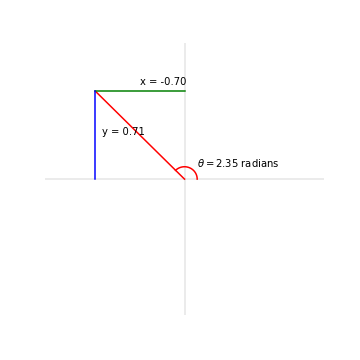

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.01), Output())…

In [22]:
%matplotlib notebook

fig = plt.figure(1, figsize=(5,5))
ax = plt.axes()
plt.plot([-2,2],[0,0],'k', alpha = 0.1)
plt.plot([0,0],[-2,2],'k', alpha = 0.1)
line, = ax.plot([],[],'r', label = '$[x,y]=[sin(\\theta), cos(\\theta)]$')
xangle, = ax.plot([],[],'r')
text = plt.text(0.14*np.cos(np.pi/4), 0.14*np.sin(np.pi/4),'')

# x length
xlength, = plt.plot([], [],'g')
xtext = plt.text(0, 0,'x')
# y length
ylength, = plt.plot([], [],'b')
ytext = plt.text(0, 0,'y')

# axis stuff
plt.axis('off')
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

def init():
    line.set_data([], [])
    xangle.set_data([],[])
    text.set_text('')
    xlength.set_data([],[])
    xlength.set_label('')
    xtext.set_position([0,0])
    xtext.set_text('')
    ylength.set_data([],[])
    ylength.set_label('')
    ytext.set_position([0,0])
    ytext.set_text('')
        
init()
        
def f(theta):
    thetavec = np.linspace(0,theta)
    x = np.cos(theta)
    y = np.sin(theta)

    line.set_data([0,x], [0,y])
    xangle.set_data(0.1*np.cos(thetavec), 0.1*np.sin(thetavec))
    text.set_text('$\\theta = $'+'{:.2f} radians'.format(theta))
    xlength.set_data([0,x], [y,y])
    xlength.set_label('x = {:.02f}'.format(x))
    xtext.set_position((x/2, y+0.05))
    xtext.set_text('x = {:.2f}'.format(x))
    ylength.set_data([x,x], [0,y])
    ylength.set_label('y = {:.02f}'.format(y))
    ytext.set_position((x+0.05, y/2))
    ytext.set_text('y = {:.2f}'.format(y))

interactive(f, theta=FloatSlider(min=0, max=2*np.pi, step=1e-2, continuous_update=True))

## Save line data to dictionary

This should be a little faster due to preprocessing.

In [58]:
theta = np.arange(0,2*np.pi,1e-2)
data = {}
for t in theta:
    data['{:.2f}'.format(t)] = {}
    subdict = data['{:.2f}'.format(t)]
    subdict['thetavec'] = np.linspace(0,t)
    subdict['x'] = np.cos(t)
    subdict['y'] = np.sin(t)
    subdict['line'] = ([0,subdict['x']], [0,subdict['y']])
    subdict['xangle'] = (0.1*np.cos(subdict['thetavec']), 0.1*np.sin(subdict['thetavec']))
    subdict['text'] = '$\\theta = $'+'{:.2f} radians'.format(t)
    subdict['xlength'] = ([0,subdict['x']], [subdict['y'],subdict['y']])

<IPython.core.display.Javascript object>


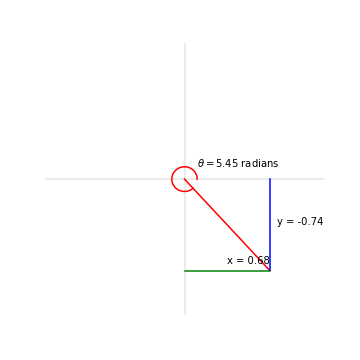

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.0001), Output(…

In [63]:
import time

fig = plt.figure(2, figsize=(5,5))
ax = plt.axes()
plt.plot([-2,2],[0,0],'k', alpha = 0.1)
plt.plot([0,0],[-2,2],'k', alpha = 0.1)
line, = ax.plot([],[],'r', label = '$[x,y]=[sin(\\theta), cos(\\theta)]$')
xangle, = ax.plot([],[],'r')
text = plt.text(0.14*np.cos(np.pi/4), 0.14*np.sin(np.pi/4),'')

# x length
xlength, = plt.plot([], [],'g')
xtext = plt.text(0, 0,'x')
# y length
ylength, = plt.plot([], [],'b')
ytext = plt.text(0, 0,'y')

# axis stuff
plt.axis('off')
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

def init():
    line.set_data([], [])
    xangle.set_data([],[])
    text.set_text('')
    xlength.set_data([],[])
    xlength.set_label('')
    xtext.set_position([0,0])
    xtext.set_text('')
    ylength.set_data([],[])
    ylength.set_label('')
    ytext.set_position([0,0])
    ytext.set_text('')
        
init()
        
def f(theta):
    start = time.time()
    thetavec = np.linspace(0,theta)
    x = np.cos(theta)
    y = np.sin(theta)
    subdict = data['{:.2f}'.format(theta)]

    line.set_data(*subdict['line'])
    xangle.set_data(*subdict['xangle'])
    text.set_text(subdict['text'])
    xlength.set_data(*subdict['xlength'])
    xlength.set_label('x = {:.02f}'.format(x))
    xtext.set_position((x/2, y+0.05))
    xtext.set_text('x = {:.2f}'.format(x))
    ylength.set_data([x,x], [0,y])
    ylength.set_label('y = {:.02f}'.format(y))
    ytext.set_position((x+0.05, y/2))
    ytext.set_text('y = {:.2f}'.format(y))
    print(time.time()-start)

interactive(f, theta=FloatSlider(min=0, max=2*np.pi, step=1e-4, continuous_update=True))

## Premake images and load from file

In [16]:
imagefolder = 'images\\'

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5
1.55
1.6
1.6500000000000001
1.7000000000000002
1.75
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0
2.0500000000000003
2.1
2.15
2.2
2.25
2.3000000000000003
2.35
2.4000000000000004
2.45
2.5
2.5500000000000003
2.6
2.6500000000000004
2.7
2.75
2.8000000000000003
2.85
2.9000000000000004
2.95
3.0
3.0500000000000003
3.1
3.1500000000000004
3.2
3.25
3.3000000000000003
3.35
3.4000000000000004
3.45
3.5
3.5500000000000003
3.6
3.6500000000000004
3.7
3.75
3.8000000000000003
3.85
3.9000000000000004
3.95
4.0
4.05
4.1000000000000005
4.15
4.2
4.25
4.3
4.3500000000000005
4.4
4.45
4.5
4.55
4.6000000000000005
4.65
4.7
4.75
4.800000000000001
4.8500000000000005
4.9
4.95
5.0
5.050000000000001
5.1000000000000005

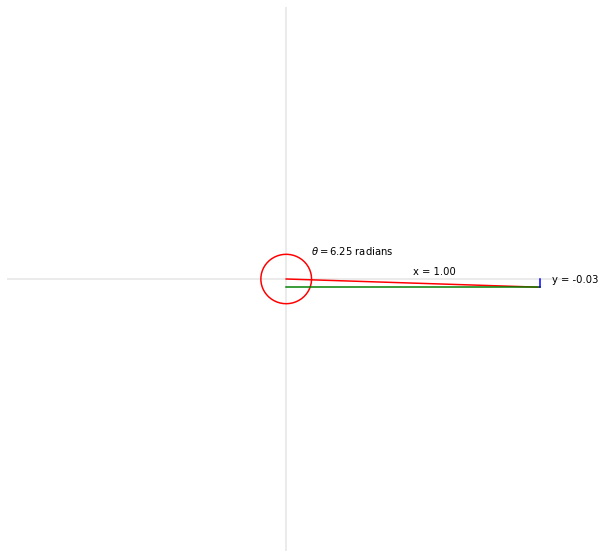

In [3]:
%matplotlib inline

fig = plt.figure(1, figsize=(10,10))
ax = plt.axes()
plt.plot([-2,2],[0,0],'k', alpha = 0.1)
plt.plot([0,0],[-2,2],'k', alpha = 0.1)
line, = ax.plot([],[],'r', label = '$[x,y]=[sin(\\theta), cos(\\theta)]$')
xangle, = ax.plot([],[],'r')
text = plt.text(0.14*np.cos(np.pi/4), 0.14*np.sin(np.pi/4),'')

# x length
xlength, = plt.plot([], [],'g')
xtext = plt.text(0, 0,'x')
# y length
ylength, = plt.plot([], [],'b')
ytext = plt.text(0, 0,'y')

# axis stuff
plt.axis('off')
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

def init():
    line.set_data([], [])
    xangle.set_data([],[])
    text.set_text('')
    xlength.set_data([],[])
    xlength.set_label('')
    xtext.set_position([0,0])
    xtext.set_text('')
    ylength.set_data([],[])
    ylength.set_label('')
    ytext.set_position([0,0])
    ytext.set_text('')
        
init()
        
def f(theta):
    thetavec = np.linspace(0,theta)
    x = np.cos(theta)
    y = np.sin(theta)

    line.set_data([0,x], [0,y])
    xangle.set_data(0.1*np.cos(thetavec), 0.1*np.sin(thetavec))
    text.set_text('$\\theta = $'+'{:.2f} radians'.format(theta))
    xlength.set_data([0,x], [y,y])
    xlength.set_label('x = {:.02f}'.format(x))
    xtext.set_position((x/2, y+0.05))
    xtext.set_text('x = {:.2f}'.format(x))
    ylength.set_data([x,x], [0,y])
    ylength.set_label('y = {:.02f}'.format(y))
    ytext.set_position((x+0.05, y/2))
    ytext.set_text('y = {:.2f}'.format(y))
    plt.savefig(imagefolder + '{:.2f}'.format(theta) + '.png', dpi = 200)

theta = np.arange(0,2*np.pi,5e-2)
for t in theta:
    print(t)
    f(t)

In [20]:
selection = SelectionSlider(
    options=['{:.2f}'.format(t) for t in theta],
    description='theta',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)
selection

SelectionSlider(continuous_update=False, description='theta', options=('0.00', '0.05', '0.10', '0.15', '0.20',…

In [7]:
import glob

images = list(glob.glob(imagefolder +'*.png'))

imagedict = {}
for image in images:
    imagedict[image] = plt.imread(image)
    print(image)

images\0.00.png
images\0.05.png
images\0.10.png
images\0.15.png
images\0.20.png
images\0.25.png
images\0.30.png
images\0.35.png
images\0.40.png
images\0.45.png
images\0.50.png
images\0.55.png
images\0.60.png
images\0.65.png
images\0.70.png
images\0.75.png
images\0.80.png
images\0.85.png
images\0.90.png
images\0.95.png
images\1.00.png
images\1.05.png
images\1.10.png
images\1.15.png
images\1.20.png
images\1.25.png
images\1.30.png
images\1.35.png
images\1.40.png
images\1.45.png
images\1.50.png
images\1.55.png
images\1.60.png
images\1.65.png
images\1.70.png
images\1.75.png
images\1.80.png
images\1.85.png
images\1.90.png
images\1.95.png
images\2.00.png
images\2.05.png
images\2.10.png
images\2.15.png
images\2.20.png
images\2.25.png
images\2.30.png
images\2.35.png
images\2.40.png
images\2.45.png
images\2.50.png
images\2.55.png
images\2.60.png
images\2.65.png
images\2.70.png
images\2.75.png
images\2.80.png
images\2.85.png
images\2.90.png
images\2.95.png
images\3.00.png
images\3.05.png
images\3

<IPython.core.display.Javascript object>


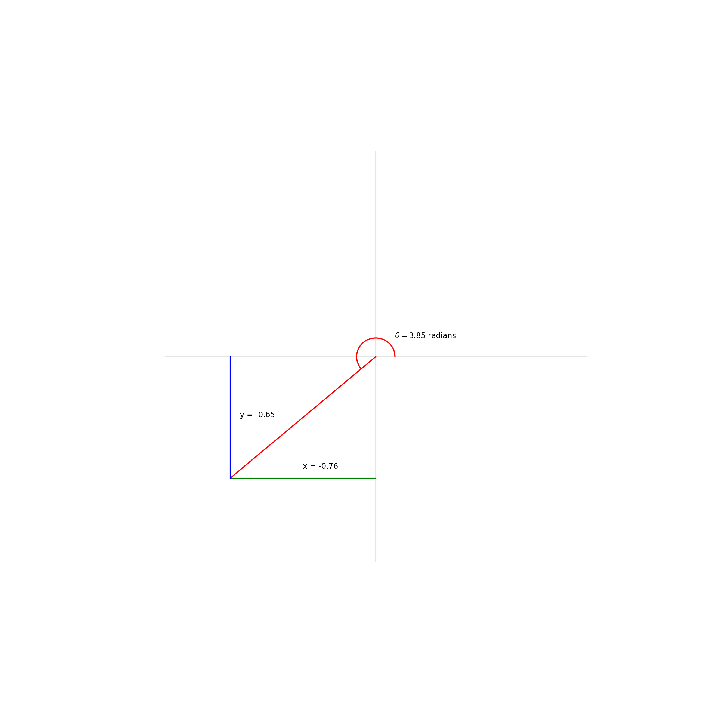

interactive(children=(SelectionSlider(continuous_update=False, description='theta', options=('0.00', '0.05', '…

In [21]:
%matplotlib notebook
fig, ax = plt.subplots(figsize = (10,10))
plt.axis('off')

def f(image):
    plt.imshow(imagedict[imagefolder + image + '.png'])
    
interactive(f, image=selection)